In [3]:
#!/usr/bin/env python
# coding: utf-8
import pandas as pd
import time
import numpy as np
from gensim import corpora
import gensim

data1 = pd.read_csv("../data/news_data/data_1.csv", encoding="gbk")
data2 = pd.read_csv("../data/news_data/data_2.csv", encoding="gbk")
data3 = pd.read_csv("../data/news_data/data_3.csv", encoding="gbk")
data4 = pd.read_csv("../data/news_data/data_4.csv", encoding="gbk")

all_data = pd.concat([data1, data2], ignore_index=True)
all_data = pd.concat([all_data, data3], ignore_index=True)
all_data = pd.concat([all_data, data4], ignore_index=True)
all_data["content"] = all_data.apply(lambda x: x["content"].strip().split(" "), axis=1)

texts = all_data["content"].to_list()
print("get all data")

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)

# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

get all data


In [4]:
all_data = all_data.ffill()
def split_time(x):
    return x["time"].split("T")[0]
all_data["time"] = all_data.apply(lambda x: split_time(x), axis=1)

In [5]:
texts = all_data["content"].to_list()
print("start to run!")
# generate LDA model

ldamodel = gensim.models.ldamodel.LdaModel.load('../model/lda_model_final/lda_7.model')

resultlist = ldamodel.get_document_topics(corpus)
# for result in resultlist:
#     print(result)

start to run!


In [6]:
resultlist[90603]

[(1, 0.23277856), (4, 0.3652703), (5, 0.030427286), (6, 0.37058988)]

In [9]:
def compute_intensity(num_topic,same_time_list):###s输入同一时间的resultlist
    num_text=len(same_time_list)        
    topic_list=[0]*num_topic
    topic_intensity=[]
    for j in range(num_text):
        for i in same_time_list[j]:#######一个文本
            topic_list[i[0]]+=i[1]
    topic_intensity=list(map(lambda x:x/num_text,topic_list))        
    return topic_intensity

def same_time_group(resultlist):
    same_t=[]
    temp=[]
    for i in range(1,len(resultlist)):
        if all_data["time"][i]==all_data["time"][i-1]:
            temp.append(resultlist[i])
        else:
            same_t.append(temp)
            temp=[]
    same_t.append(temp)
    return same_t

#############intensity_change即话题变化list，每项为每天的[prob(topic0),prob(topic1),...]
same_t=same_time_group(resultlist)######每项为同一天内的文章
intensity_change=[]
for same_time_list in same_t:
    intensity_change.append(compute_intensity(7,same_time_list))

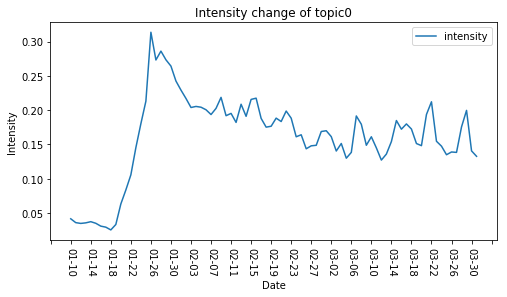

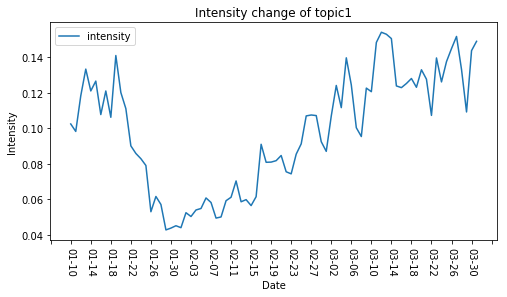

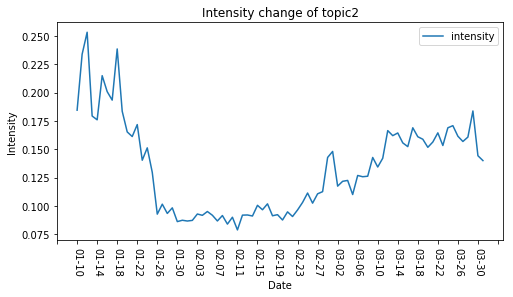

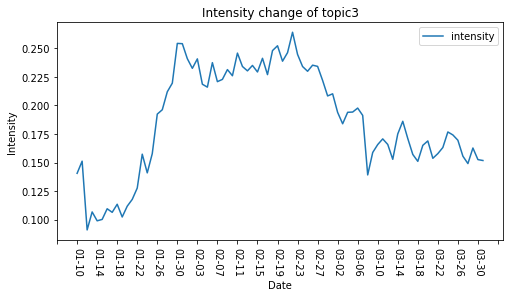

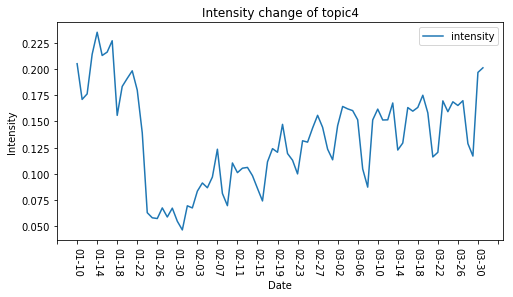

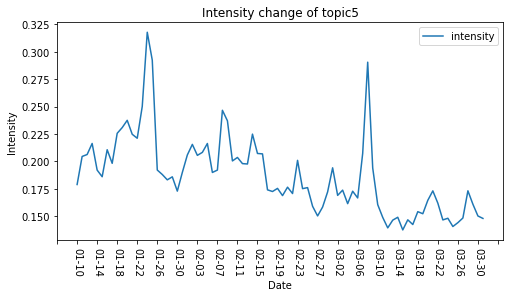

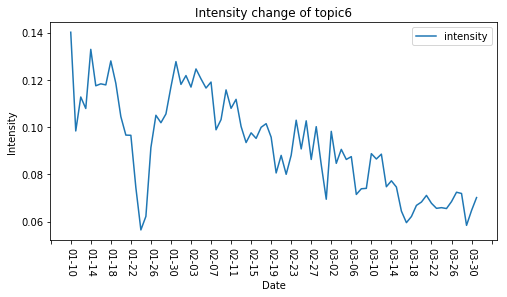

In [25]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

for j in range(7):
    y=[]
    for i in range(len(intensity_change)):
        y.append(intensity_change[i][j])
    x = np.unique(all_data["time"])
    for i in range(len(x)):
        x[i] = "-".join(x[i].split(" ")[1:])

    fig, ax = plt.subplots(1,1, figsize=(8, 4))
    ax.plot(x,y,label='intensity')
    plt.xlabel("Date")
    plt.ylabel("Intensity")
    plt.title("Intensity change of topic"+str(j))
    plt.legend()
    plt.xticks(rotation=270)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
    #plt.savefig("0.jpg")
    plt.show()

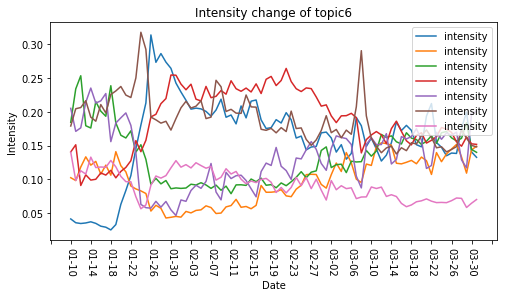

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1,1, figsize=(8, 4))
for j in range(7):
    y=[]
    for i in range(len(intensity_change)):
        y.append(intensity_change[i][j])
    x = np.unique(all_data["time"])
    for i in range(len(x)):
        x[i] = "-".join(x[i].split(" ")[1:])

    ax.plot(x,y,label='intensity')
    plt.xlabel("Date")
    plt.ylabel("Intensity")
    plt.title("Intensity change of topic"+str(j))
    plt.legend()
    plt.xticks(rotation=270)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
    #plt.savefig("0.jpg")
plt.show()